<h3>Gradiente descendente</h3><br>
Os métodos baseados no gradiente descendente são os mais comummente utilizados para encontrar uma sequência minimizadora de uma dada função $f(x)$<br>

O algoritmo seguinte (em pseudo-código) mostra a forma geral do processo iterativo do gradiente. Na sua forma mais simples, a matriz <b>B</b> é a matriz identidade e a direcção descendente é simplesmente o gradiente negativo da função:
<ol>
    <li><b>dado</b> um ponto inicial $x_0$, $i = 0$</li>
    <li><b>repetir</b></li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calcular o <i>step size</i>(ou learning rate) $\eta$</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calcular a direcção descendente $-\mathbf B \nabla f(x_i)$</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{i+1} \leftarrow x_i -\eta \mathbf B \nabla f(x_i)$</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $i \leftarrow i + 1$</li>
    <li><b>até</b> o critério de paragem ser satisfeito</li>
</ol>

Vamos brincar um pouco.<br>
Consideremos a seguinte função:

$$f(x) = (x + 2)^2 - 16exp(-(x - 2)^2)$$

e a sua implementação em python:

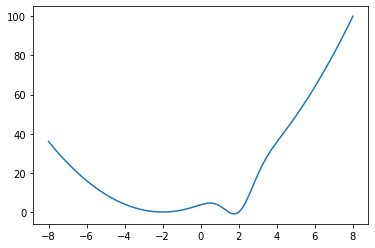

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f_x(x):
    return np.power(x + 2, 2) - 16 * np.exp(-np.power((x - 2), 2))

#Vejamos a sua forma no intervalo [-8, 8]
def main_plot():
    x = np.arange(-8, 8, 0.001)
    y = map(lambda u: f_x(u), x)
    plt.plot(x, list(y))
main_plot()
plt.show()

Esta função não foi escolhida ao acaso. Como se pode ver pelo gráfico, a função não é convexa (apresenta um mínimo local)

O gradiente da função $f(x) = (x + 2)^2 - 16exp(-(x - 2)^2)$ é:

$$
\frac{df(x)}{dx} = (2x + 4) - 16(-2x + 4)exp(-(x - 2)^2)
$$

que podemos implementar da seguinte forma:

In [4]:
def grad_f_x(x):
    return (2 * x - 4) - 16 * (-2 * x + 4) * np.exp(-np.power(x - 2, 2))

Armados com a função e com o seu gradiente, podemos implementar um método de gradiente descendente:

In [5]:
def gradient_descent(x0, func, grad):
    #precisão da solução
    precision = 0.001
    #Learning rate: muito pequeno pode demorar muito a convergir; muito grande pode fazer um 'overshoot' ao mínimo
    learning_rate = 0.0001
    #Temos de dar um limite ao número de iteracções
    max_iter = 10000
    x_new = x0
    res = []
    for i in range(max_iter):
        x_old = x_new
        #Vamos usar B = 1
        x_new = x_old - learning_rate * grad(x_old)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new, f_x_new])
        #print(f_x_new - f_x_old)
        if(abs (f_x_new - f_x_old) < precision):
            print("Precisão %f alcançada:" % (f_x_new - f_x_old))
            return np.array(res)
    print("Iteracção máxima alcançada")
    return np.array(res)

Precisão -0.001000 alcançada:


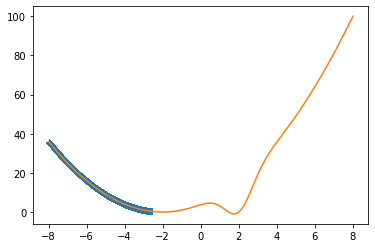

In [6]:
#Vamos então tentar encontrar o mínimo da função começando com um valor inicial de x0 = -8

x0 = -8
res = gradient_descent(x0, f_x, grad_f_x)
plt.plot(res[:,0], res[:, 1], '+')
main_plot()
plt.show()

Como começámos a sequência de minimização pelo lado esquerdo, com $x_0 = 8$, alcançámos o mínimo local. <br>
Se escolhermos agora como valor inicial $x_0 = 8$, obtemos:

Precisão -0.000998 alcançada:


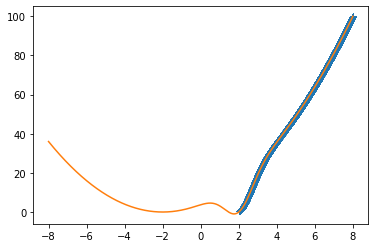

In [7]:
x0 = 8
res = gradient_descent(x0, f_x, grad_f_x)
plt.plot(res[:,0], res[:, 1], '+')
main_plot()
plt.show()

Agora alcaçámos o mínimo global. Será interessante experimentar com diferentes valores do <i>learning rate</i> e a precisão

Consideremos agora o problema da regressão linear (método dos mínimos quadrados) no seguinte conjunto de dados que mostra os recordes olímpicos dos 100 m ao longo dos anos:

In [8]:
from numpy import genfromtxt

def get_data_set():
    data_set = genfromtxt('100MetrosOlymp.csv', delimiter=',')
    print(data_set.shape)
    x = data_set[:,0]
    y = data_set[:,1]
    return x,y

x,y = get_data_set()

plt.xlabel("Ano")
plt.ylabel("Velocidade (segundos)")
plt.plot(x, y, 'o')
plt.show()

print(data_set)

OSError: 100MetrosOlymp.csv not found.

Neste caso o nosso modelo pode ser escrito da seguinte forma:

$$
t_n = f(x_n;w_0,w_1) = \mathbf w^T \mathbf x_n = w_0 + w_1x_n
$$
e
$$
\mathbf w = \begin{bmatrix}
            w_0 \\
            w_1 \\
            \end{bmatrix}
$$
<br>
$$
\mathbf x_n = \begin{bmatrix}
            1 \\
            x_n \\
            \end{bmatrix}
$$
Aqui o truque, de forma a conseguir vectorizar, é combinar $w_0$ e $w_1$ num único vector de parâmetros e criar um vector de dados $x_n$, aumentando cada $x_n$ com um 1.<br>
Podemos definir a função de erro para cada valor possível de $\mathbf w$:

$$
e(\mathbf w) = \frac{1}{N}\sum_{n=1}^N (t_n - \mathbf w^T \mathbf x_n)^2
$$

ou, melhor ainda, na sua forma vectorizada:

$$
e(\mathbf w) = \frac{1}{N} (\mathbf t - \mathbf X \mathbf w)^T(\mathbf t - \mathbf X \mathbf w)
$$

onde 
<p>
$
\mathbf X = \begin{bmatrix}
            \mathbf x_1^T \\
            \mathbf x_2^T \\
            . \\
            . \\
            . \\
            \mathbf x_n^T \\
            \end{bmatrix}
          = \begin{bmatrix}
            1 & x_1 \\
            1 & x_2 \\
            . & .    \\
            . & .    \\
            . & .    \\
            1 & x_n \\
            \end{bmatrix}
$, 
$
\mathbf t = \begin{bmatrix}
            t_1 \\
            t_2 \\
            . & .    \\
            . & .    \\
            . & .    \\
            t_n \\
            \end{bmatrix}
$<p>
Será esta a função que queremos minimizar de forma a encontrar os valores óptimos de $\mathbf w \in \Bbb R^2$. Para tal, teremos de encontrar o gradiente do erro $\frac{\partial e}{\partial \mathbf w} = \begin{bmatrix}
            \frac{\partial e}{\partial w_0} \\
            \frac{\partial e}{\partial w_1} \\
            \end{bmatrix}$
    
<p></p>
Obtemos:
$$
\frac{\partial e}{\partial \mathbf w} = \frac{2}{N} \mathbf X^T \mathbf X \mathbf w - \frac{2}{N} \mathbf X^T \mathbf t = \frac{2}{N} \mathbf X^T (\mathbf X \mathbf w - \mathbf t)$$
    
    
Então, de acordo com a regra de update do pseudo-código:

$$
\mathbf w := \mathbf w - \eta \frac{2}{N} \mathbf X^T (\mathbf X \mathbf w - \mathbf t)
$$

<b>Nota:</b> Algumas identidades úteis para quando estamos a diferenciar a respeito de um vector:

$$
$$
\begin{array}{c|lcr}
f(\mathbf w) & \frac{\partial f}{\partial \mathbf w} \\
\hline
\mathbf w^T \mathbf x & \mathbf x \\
\mathbf x^T \mathbf w & \mathbf x \\
\mathbf w^T \mathbf w & 2\mathbf w \\
\mathbf w^T \mathbf C \mathbf w & 2\mathbf C \mathbf w \\
\end{array}
$$
$$
    

(27, 2)
Precision reached.
[ 0.43871002 -1.5307846 ]


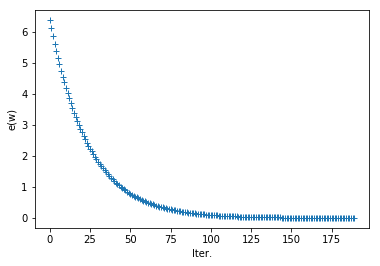

In [169]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

def cost(w, x, t):
    N = len(t)
    coef = 1. / N
    xw = np.dot(x, w)
    xw_t = xw - t
    return coef * np.dot(xw_t.T, xw_t)

def gradient_desc_vec(x, t):
    #Inicializar o vector de pesos
    w0 = np.array([-2,-2])
    N = len(t)
    #precisão da solução
    precision = 0.0001
    #Learning rate: muito pequeno pode demorar muito a convergir; muito grande pode fazer um 'overshoot' ao mínimo
    learning_rate = 0.01
    coef = (2 * learning_rate) / N
    #Temos de dar um limite ao número de iteracções
    max_iter = 10000
    w_new = w0
    res = []
    for i in range(max_iter):
        w_old = w_new
        xw = np.dot(x, w_old)
        xw_t = xw - t
        value = np.dot(x.T, xw_t)
        w_new = w_old - coef * value
        cost_old = cost(w_old, x, t)
        cost_new = cost(w_new, x, t)
        res.append([i, cost_new])
        #print(res)
        if(abs(cost_new - cost_old) < precision):
            print("Precision reached.")
            return w_new, np.array(res)    
    print("Max iter reached")
    return w_new, np.array(res)

x,t = get_data_set() 
#Normalize
x = normalize(x)
t = normalize(t)

x = np.c_[np.ones(len(x)), x]
w, res = gradient_desc_vec(x, t)   
print(w)

plt.plot(res[:,0], res[:, 1], '+')
plt.xlabel("Iter.")
plt.ylabel("e(w)")

plt.show()

[ 0.43871002 -1.5307846 ]


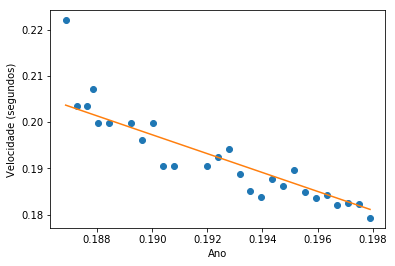

In [170]:
#t = wo + w1x
data_set = genfromtxt('100MetrosOlymp.csv', delimiter=',')
x = data_set[:,0]
t = data_set[:,1]

x = normalize(x)
t = normalize(t)

plt.xlabel("Ano")
plt.ylabel("Velocidade (segundos)")
plt.plot(x, t, 'o')
print(w)


w_norm = map(lambda u: w[0] + w[1] * u, x)
w_norm = normalize(list(w_norm))

plt.plot(x, w_norm)
plt.show()

<h4>Algumas considerações finais</h4>

Não sendo requisito obrigatório, penso que seja boa prática normalizar os dados antes de correr o gradiente. Desta forma, a procura do mínimo é mais rápida e eficiente. Isto acontece porque $\mathbf w$ desce rápido em intervalos pequenos  devagar em intervalos grandes. de forma que pode oscilar ineficientemente se as variáveis não estiverem nos mesmo intervalos.<br>

É interessante, sobretudo pare efeitos de debugging, plotar a função de erro, onde o eixo dos xx representa o número de iteracções. Desta forma podemos ver se o gradiente está efectivamente a descer. Se não estiver, é provavel que se tenha de baixar mais o valor da <i>learnign rate</i><br>

Olhando para os dados, nota-se alguma oscilação ao longo dos anos. Nesse sentido poderá também ser interessante modelar a curva com um polinómio do género:

$$t(x,\mathbf w) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \sum_{j=0}^M w_j x^j$$

em vez de termos só

$$
t(x,\mathbf w) = w_0 + w_1x_n
$$

Ver <a href="https://aimlsite.wordpress.com/2018/03/16/ajuste-polinomial-com-python/">Ajuste Polinómial</a> para mais detalhes.